In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
all_tweets = pd.read_csv("./DataSources/TwitterData/cleaned_tweets_20210820.csv")
print(all_tweets.shape)
all_tweets.head()

(34515, 25)


,index,tweet_id,tweet_date,tweeter_id,tweeter_user_name,tweeter_screen_name,tweeter_location,message_text,in_reply_to_user_screen_name,quote_tweet_screen_name,...,mentioned,hashtags,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_lemmatized,Clean_MessageText,tweet_date_dt,time_bins_12h,day_bins
0,0,1420355029081395203,2021-07-28 12:06:42,865262041103302656,Chris Myers,myerschrismyer1,Richmond North Yorkshire,RT @LeslieH24367191: 'Do better!' Boris Johnso...,NaN,NaN,...,[],[],Do better Boris Johnson issues scathing respo...,"['do', 'better', 'boris', 'johnson', 'issues',...","['better', 'boris', 'johnson', 'issues', 'scat...","['good', 'boris', 'johnson', 'issues', 'scathi...",good boris johnson issues scathing response sa...,2021-07-28 12:06:42,2021-07-28 12:00:00,28
1,1,1420354120041615364,2021-07-28 12:03:05,229645453,Emily Sheffield,emilysheffield,London,RT @NaheedMajeed: Spot on @standardnews With L...,NaN,NaN,...,['@standardnews'],[],Spot on With London on track to break record...,"['spot', 'on', 'with', 'london', 'on', 'track'...","['spot', 'track', 'break', 'record', 'teenage'...","['spot', 'track', 'break', 'record', 'teenage'...",spot track break record teenage murdersstop se...,2021-07-28 12:03:05,2021-07-28 12:00:00,28
2,2,1420351785156366337,2021-07-28 11:53:49,2843896642,Basilewitch,basilewitch,France,RT @Short2Cjs: Boris today speaking to Nick Fe...,NaN,NaN,...,[],[],Boris today speaking to Nick Ferrari about Kh...,"['boris', 'today', 'speaking', 'to', 'nick', '...","['boris', 'today', 'speaking', 'nick', 'ferrar...","['boris', 'today', 'speaking', 'nick', 'ferrar...",boris today speaking nick ferrari khan … done ...,2021-07-28 11:53:49,2021-07-28 00:00:00,28
3,3,1420350419449094148,2021-07-28 11:48:23,556315551,Dean Cowcher,DeanCowcher,Bexleyheath London England,RT @LeslieH24367191: 'Do better!' Boris Johnso...,NaN,NaN,...,[],[],Do better Boris Johnson issues scathing respo...,"['do', 'better', 'boris', 'johnson', 'issues',...","['better', 'boris', 'johnson', 'issues', 'scat...","['good', 'boris', 'johnson', 'issues', 'scathi...",good boris johnson issues scathing response sa...,2021-07-28 11:48:23,2021-07-28 00:00:00,28
4,4,1420349615954669574,2021-07-28 11:45:11,1267062754915090434,Alfiecat,sonya_annie,unknown,RT @Short2Cjs: Boris today speaking to Nick Fe...,NaN,NaN,...,[],[],Boris today speaking to Nick Ferrari about Kh...,"['boris', 'today', 'speaking', 'to', 'nick', '...","['boris', 'today', 'speaking', 'nick', 'ferrar...","['boris', 'today', 'speaking', 'nick', 'ferrar...",boris today speaking nick ferrari khan … done ...,2021-07-28 11:45:11,2021-07-28 00:00:00,28


In [3]:
hashtags = pd.read_csv("./DataSources/TwitterData/important_hashtags_20210809.csv")
print(hashtags.shape)
hashtags

hashtags.sort_values(by=['class_label', 'community_id'], ascending=False)

(45, 3)


,hashtag,class_label,community_id
34,#austerity,FOR,0
35,#beatingcrimeplan,FOR,0
36,#borisjohnson,FOR,0
37,#policecuts,FOR,0
38,#racism,FOR,0
39,#stopandsearch,FOR,0
11,#bournemouth,AGAINST,4
14,#covid19,AGAINST,4
16,#feminist,AGAINST,4
17,#harassment,AGAINST,4


## Conclusions on hashtags
- Remove less relevant hashtags within Community id = 4, specifically: #bournemouth and #metooindia
- Remove #judaspig as that's from a novel
- community id 0 corresponds most closely with the 'FOR' classification but don't change the classification of #knifecrime or #khanage as they were actually seed words for the AGAINST classification, and don't change #violentcrime as that's close in nature to #knifecrime. Therefore just swap class for #stop from AGAINST to FOR
- community 2 are interesting in that they relate to an old case but related tweets are heavily critical of met police and so keep, and keep classification = AGAINST

In [4]:
hashtags.loc[hashtags.hashtag == "#stop", 'class_label'] = 'FOR'
hashtags_clean = hashtags[~hashtags.hashtag.isin(['#bournemouth', '#judaspig', '#metooindia'])].copy()

hashtags_clean.sort_values(by=['class_label', 'community_id'], ascending=False)

,hashtag,class_label,community_id
34,#austerity,FOR,0
35,#beatingcrimeplan,FOR,0
36,#borisjohnson,FOR,0
37,#policecuts,FOR,0
38,#racism,FOR,0
39,#stopandsearch,FOR,0
40,#stop,FOR,0
14,#covid19,AGAINST,4
16,#feminist,AGAINST,4
17,#harassment,AGAINST,4


## Now classify tweets according to which class the majority of their hashtags fall into

In [5]:
for_hashtags = hashtags_clean['hashtag'][hashtags_clean.class_label == 'FOR'].to_list()
against_hashtags = hashtags_clean['hashtag'][hashtags_clean.class_label == 'AGAINST'].to_list()

set_for = set(for_hashtags)
set_against = set(against_hashtags)

### Comparing hashtags
I will be comparing the hashtags within a single tweet with the for and against hashtag lists and summing the number of matches to identify whether the tweet is predominately for or against the mayor. I will use pandas 'sets' and its difference function to do this. This was inspired by https://www.stechies.com/compare-lists-python-using-set-cmp-function/

In [6]:
def string_to_list(my_str):
    delimiter = ","
    my_str = my_str.replace("[", "")
    my_str = my_str.replace("]", "")
    my_str = my_str.replace("'", "")
    my_str = my_str.replace(" ", "")
    my_list = my_str.split(delimiter)
    return my_list

def get_tweet_class(hashtags, set_for, set_against):

    class_value = 'NONE'
    
    if len(hashtags) > 2 : # a tweet with no hashtags contains [] and so len==2 means no hashtags
        
        class_value = 'HAS_HASHTAG'
        
        hashtags_in_tweet = string_to_list(hashtags)
        set_hashtags = set(hashtags_in_tweet)

        # take intersections of two lists                
        for_test = set_for.intersection(set_hashtags)
        against_test = set_against.intersection(set_hashtags)
    
        # check if any matches with our for/against lists 
        if (len(against_test) > 0) | (len(for_test) > 0):
                        
            #there is at least one match, now test which matches more closely
            if len(against_test) > len(for_test):
                class_value = 'AGAINST'
            else:
                class_value = 'FOR'
        
    return class_value

In [7]:
all_tweets['label'] = '' 
all_tweets['label'] = all_tweets['hashtags'].apply(lambda x: get_tweet_class(x, set_for, set_against))

all_tweets_count = all_tweets['label'].count()
for_count = all_tweets['label'][all_tweets.label == 'FOR'].count()
for_pct = for_count / all_tweets_count
against_count = all_tweets['label'][all_tweets.label == 'AGAINST'].count()
against_pct = against_count / all_tweets_count
other_tag_count = all_tweets['label'][all_tweets.label == 'HAS_HASHTAG'].count()
other_tag_pct = other_tag_count / all_tweets_count

print("Out of a total of {:,} tweets, we have the following classifications:\nAGAINST: {} ({:.1%})\nFOR: {} ({:.1%})\nOther Hashtag: {} ({:.1%})".format(all_tweets_count, 
                                                                                                                                        against_count, against_pct, 
                                                                                                                                        for_count, for_pct,
                                                                                                                                        other_tag_count, other_tag_pct))

Out of a total of 34,515 tweets, we have the following classifications:
AGAINST: 853 (2.5%)
FOR: 40 (0.1%)
Other Hashtag: 1208 (3.5%)


### Comments 
It tells us something that more than 10 times the hashtags are against the Mayors evidence but having just 5.8% of tweets containing hashtags and only 2.3% containing hashtags with which we can classify our tweeters is not a great return.

This is because the objectiuve for this exercise is to use hashtags as a means to classify tweet sentiment and, as discussed by Bovet, large usage of opinion hashtags (and polarisation of their usage) are strong pre conditions for their method being successful.

We have around 500 tweets in the AGAINST class but too few in the FOR class to be able to use these tweets on their own as the basis for the other label in our classification. We could use SMOTE as we did previously but oversampling just 37 tweets dramatically increases the likelyhood of an overfitted model. We therefore propose creating the FOR tweets by taking a random sample of all tweets which aren't labeled AGAINST but do have a hashtag.  

Having created these datasets we will then analyse their content before progressing onto creating features as inputs to our classification model.

In [8]:
col_list = ['tweet_id',
           'tweeter_screen_name',
           'hashtags',
           'Tweet_lemmatized',
           'Clean_MessageText',
           'label']

against_tweets = all_tweets[col_list][all_tweets.label == 'AGAINST']
against_tweets['target'] = 1
not_against_tweets = all_tweets[col_list][(all_tweets.label == 'FOR') | (all_tweets.label == 'HAS_HASHTAG')].sample(n=564)
not_against_tweets['target'] = 0

pruned_tweets = pd.concat([against_tweets, not_against_tweets]).reset_index(drop=True)
pruned_tweets.drop('label', axis=1, inplace=True)

print(pruned_tweets.shape)
display(pruned_tweets.head())
display(pruned_tweets.tail())

(1417, 6)


,tweet_id,tweeter_screen_name,hashtags,Tweet_lemmatized,Clean_MessageText,target
0,1419696027821481990,flyingeze,"['#crime', '#hortonandwellington', '#knife']","['seriously', 'injured', 'stabbing', 'teen', '...",seriously injured stabbing teen girl woman cha...,1
1,1419551117877338112,NEWSONE14898745,"['#sadiq', '#khan', '#knife', '#crime']","['’', 'six', 'years', '’', 'sadiq', 'khan', 'l...",’ six years ’ sadiq khan lambasted knife crime...,1
2,1418648214689955841,Mariebe10098426,['#khanage'],"['’', 'six', 'years', '’', 'lambasted', 'knife...",’ six years ’ lambasted knife crime surge khan...,1
3,1418617079301816323,sambonnar2,"['#knifecrime', '#london']","['knifecrime', 'fallen', 'low', 'total', 'five...",knifecrime fallen low total five years,1
4,1418616885462110208,WembleyCrime,"['#knifecrime', '#london']","['knifecrime', 'fallen', 'low', 'total', 'five...",knifecrime fallen low total five years,1


,tweet_id,tweeter_screen_name,hashtags,Tweet_lemmatized,Clean_MessageText,target
1412,1422952247051399172,BucksRam,"['#sadiqkhan', '#rmt', '#aslef']","['sadiqkhan', 'hogwash', 'rmt', 'aslef', 'deci...",sadiqkhan hogwash rmt aslef decide khan blindl...,0
1413,1423454039337996292,standardnews,['#escomment'],"['escomment', 'ten', 'years', 'ago', 'week', '...",escomment ten years ago week witnessed serious...,0
1414,1422245713522606082,obbsie,['#croydon'],"['yearold', 'boy', 'taken', 'hospital', 'follo...",yearold boy taken hospital following stabbing ...,0
1415,1427697624019136515,alfabeto,"['#skynews', '#breakingnews']","['✱', 'boy', 'appears', 'court', 'charged', 'm...",✱ boy appears court charged murder stabbed dea...,0
1416,1427216792859156480,sassbrown01,"['#actnow', '#climateaction']","['🗣', 'twitter', 'world', 'caring', 'planet', ...",🗣 twitter world caring planet share crime actn...,0


### Comments
Tweets with target = 0 should be tweets that aren't actively against the Mayor but the message text suggests otherwise and these tweets have be wrongly classified because classification is based on hashtags whereas these tweets don't contain hashtags and the sentiment is instead found within the message text itself.

This merits further investigation here, to identify key themes in  

In [9]:
import twitter_NLP_functions as tw_nlp

Loading BokehJS ...


 ----------- ALL WORDS - FOR ---------- 



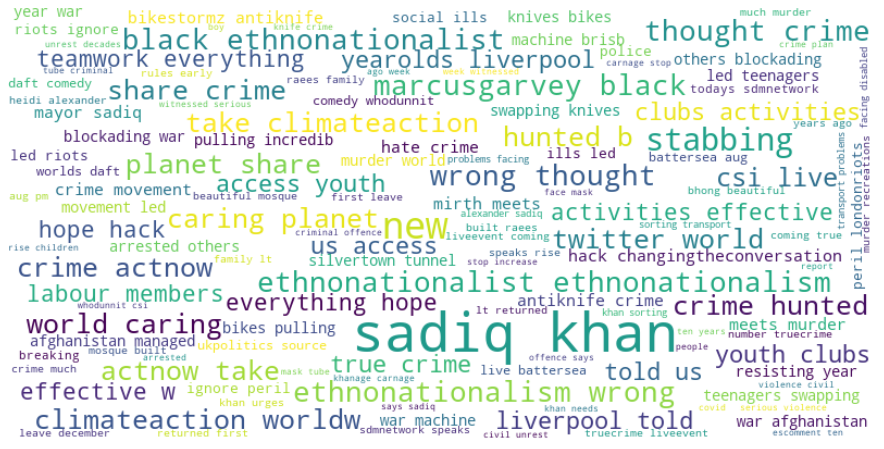


 ----------- ALL WORDS - AGAINST ---------- 



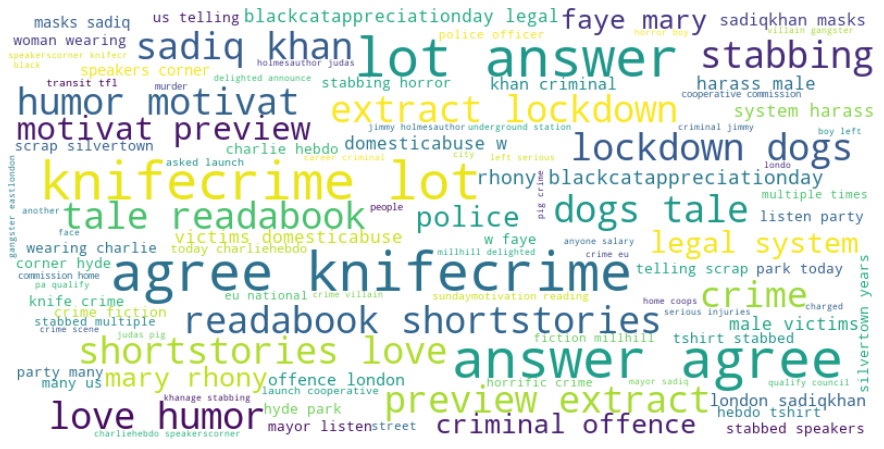

Number of words, FOR = 1748
Number of words, AGAINST = 1650


In [10]:
all_clean_words_for = " ".join(ttext for ttext in pruned_tweets[pruned_tweets.target==0]['Clean_MessageText']) # code taken from VA_Lab08 (Text)
all_clean_words_against = " ".join(ttext for ttext in pruned_tweets[pruned_tweets.target==1]['Clean_MessageText']) # code taken from VA_Lab08 (Text)

tw_nlp.plot_wordcloud(all_clean_words_for, 'ALL WORDS - FOR')
tw_nlp.plot_wordcloud(all_clean_words_against, 'ALL WORDS - AGAINST')

unique_for = tw_nlp.unique_words(all_clean_words_for)
unique_against = tw_nlp.unique_words(all_clean_words_against)

print("Number of words, FOR = " + str(len(unique_for))) # we have 462922 unique words
print("Number of words, AGAINST = " + str(len(unique_against))) 

In [11]:
tw_nlp.plot_ngrams(pruned_tweets[pruned_tweets.target==0], 'Clean_MessageText')

In [12]:
tw_nlp.plot_ngrams(pruned_tweets[pruned_tweets.target==1], 'Clean_MessageText')

## Comments
Tweets within the FOR and AGAINST classes use very similar words in the body of the text and this means the features we create from them (bag of words, count vectorizer) will be similar too. Which will impact the performance of our classifier. This problem arisesd because less than 6% of our tweets contain any hashtags at all and less than 2.5% contained hashtags that we used to classify tweets.

Before progressing, it's worth double checking the words used in the message text of tweets which we'd originally classified as supporting the Mayor. This could help us understand whether our problem arises from having to randomly select tweets


 ----------- ALL WORDS - FOR, from hashtags ---------- 



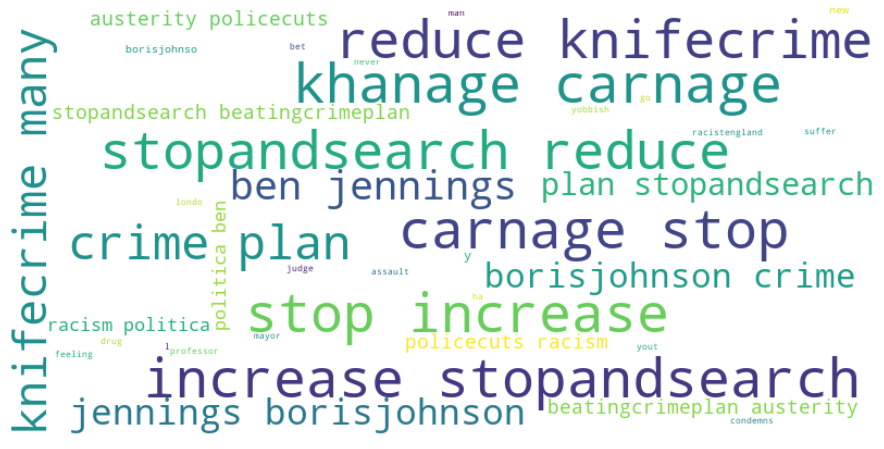

Number of words, FOR, from hashtags = 106


In [13]:
all_clean_words_for_hash = " ".join(ttext for ttext in all_tweets[all_tweets.label == 'FOR']['Clean_MessageText']) # code taken from VA_Lab08 (Text)

tw_nlp.plot_wordcloud(all_clean_words_for_hash, 'ALL WORDS - FOR, from hashtags')

unique_for_hash = tw_nlp.unique_words(all_clean_words_for_hash)

print("Number of words, FOR, from hashtags = " + str(len(unique_for_hash)))

In [14]:
tw_nlp.plot_ngrams(all_tweets[all_tweets.label == 'FOR'], 'Clean_MessageText')

We can see a difference in the words used in those classified as FOR tweets based on the hashtags. This suggests we could have had more success if we'd identified a greater number of tweets using hashtags which openly supported the Mayors position. This means that we confirm Bovet's original conclusion that for his classification process to work we need 'a large usage of opinion-hashtags and a polarization of opinion resulting in well seperated hashtag clusters'.

However, we want to complete the exercise to review the performance of our classifier to confirm this hypothesis. The first step is to create the features we will use to train the classification model.

Bovet used both hashtags (having first removed the cooccurring hashtags) and words within the tweet message text to generate features but we know that many most of our FOR tweets will not contain hashtags and so using them for the AGAINST tweets will bias our dataset. We will therefore purely concentrate on message body text.

However, it is <b>important that we remove from the message body text any hashtags that were used in labelling the tweets</b>. This is because leaving these hashtags skews the classification performance because we will have a one for one relationship between tweets containing these hashtags and the labels they were assigned. This is why we observed such amazing results when we erroneously missed this step, as is illustrated in the image below

<img src="tweet_labeling_ML_performance - erroneous.png">

### Create features ----> blah blah
Bovet used hashtags, we know a large number of our tweets don't contain them so just vectorize on the message text
- use vectoriser, bag of words, ngrams
- see how we get on in terms of accuracy

- then group tweets by tweeter id and class and use majority class to set opinion of tweeter
- see how many tweeters out of total we classify and therefore how many tweets out of 24,772

- compare this with what we got from community detection algorithms


### Bovet notebooks
https://github.com/alexbovet/network_lesson/blob/master/04_Twitter_Sentiment_Analysis.ipynb
https://github.com/alexbovet/network_lesson/blob/master/TwSentiment.py
https://github.com/alexbovet/network_lesson/blob/master/train_sentiment_classifier.py

### Create vocabularies containing top 50 words and ngrams
These will be used to constrain the results of the countvectorizer to mark the presence or absence of only the top 50 items
- otherwise it creates entries for every single word in the document corpus

<b> <---------- THESE RESULTS ARE WRONG, REPLACE ----------> </b>

Using 50 of each I got the following performance 
- prediction accuracy: 0.7801418439716312
- precision: 0.9339622641509434
- recall: 0.6428571428571429
- Area under the curve score: 0.7940848214285714

#### amendment - use top 100 ngrams and words
Using 100 of each I got the following performance
- prediction accuracy 0.8439716312056738
- precision 0.8928571428571429
- recall 0.8116883116883117
- Area under the curve score 0.8472504058441559

### Strip hashtags from message text
We need to be careful when stripping hashtags from clean message text because the message text could have contained the same words as used in a hashtag but as text on its own, rather than as a hashtag. Therefore, we only process tweets which also have hashtags and then only strip words from the tweet if that word ALSO exists in the list of hashtags associated with the tweet.

In [15]:
pruned_tweets.head()

,tweet_id,tweeter_screen_name,hashtags,Tweet_lemmatized,Clean_MessageText,target
0,1419696027821481990,flyingeze,"['#crime', '#hortonandwellington', '#knife']","['seriously', 'injured', 'stabbing', 'teen', '...",seriously injured stabbing teen girl woman cha...,1
1,1419551117877338112,NEWSONE14898745,"['#sadiq', '#khan', '#knife', '#crime']","['’', 'six', 'years', '’', 'sadiq', 'khan', 'l...",’ six years ’ sadiq khan lambasted knife crime...,1
2,1418648214689955841,Mariebe10098426,['#khanage'],"['’', 'six', 'years', '’', 'lambasted', 'knife...",’ six years ’ lambasted knife crime surge khan...,1
3,1418617079301816323,sambonnar2,"['#knifecrime', '#london']","['knifecrime', 'fallen', 'low', 'total', 'five...",knifecrime fallen low total five years,1
4,1418616885462110208,WembleyCrime,"['#knifecrime', '#london']","['knifecrime', 'fallen', 'low', 'total', 'five...",knifecrime fallen low total five years,1


In [16]:
from nltk.tokenize import word_tokenize

def string_to_list(my_str):
    delimiter = ","
    my_str = my_str.replace("[", "")
    my_str = my_str.replace("]", "")
    my_str = my_str.replace("'", "")
    my_str = my_str.replace(" ", "")
    my_str = my_str.replace("#", "")
    my_list = my_str.split(delimiter)
    return my_list


def remove_label_hashtags(text, hashtags, ignore_words):
    
    if len(hashtags) == 2 : # a tweet with no hashtags contains [] and so len==2 means no hashtags
        pruned_text = text
    else:
        my_hashtags = string_to_list(hashtags) # turns hashtag string into a list and removes the '#' symbol
        
        # create a list of all hashtag words in this tweet that are also in our ignore words 
        # influenced by https://www.kite.com/python/answers/how-to-find-common-elements-between-two-lists-in-python
        
        my_hashtags_as_set = set(my_hashtags)
        intersection = my_hashtags_as_set.intersection(ignore_words)
        ignore_list = list(intersection)
        
        if len(ignore_list) == 0:
            pruned_text = text
        else:
            tokenized_text = word_tokenize(text)
            pruned_text_list = [w for w in tokenized_text if not w in ignore_list]
            pruned_text = ' '.join([w for w in pruned_text_list])
        
    return pruned_text


ignore_hashtags_set = set_for.union(set_against) # create a single set containing all hashtags

ignore_hashtags = list(ignore_hashtags_set) # turn set into a list
ignore_words = [w[1:] for w in ignore_hashtags] # create a list of ignore words which are hashtags but without the '#' 

print("Number of items in set_for: {}, number in set_against: {} and in the combined list: {}".format(len(set_for),
                                                                                                    len(set_against),
                                                                                                    len(ignore_words)))

pruned_tweets['Clean_MessageText_refined'] = pruned_tweets.apply(lambda x: remove_label_hashtags(x['Clean_MessageText'], 
                                                                                                x['hashtags'], ignore_words), 
                                                                                                 axis=1)

pruned_tweets.head()

Number of items in set_for: 7, number in set_against: 35 and in the combined list: 42


,tweet_id,tweeter_screen_name,hashtags,Tweet_lemmatized,Clean_MessageText,target,Clean_MessageText_refined
0,1419696027821481990,flyingeze,"['#crime', '#hortonandwellington', '#knife']","['seriously', 'injured', 'stabbing', 'teen', '...",seriously injured stabbing teen girl woman cha...,1,seriously injured stabbing teen girl woman cha...
1,1419551117877338112,NEWSONE14898745,"['#sadiq', '#khan', '#knife', '#crime']","['’', 'six', 'years', '’', 'sadiq', 'khan', 'l...",’ six years ’ sadiq khan lambasted knife crime...,1,’ six years ’ sadiq khan lambasted knife surge...
2,1418648214689955841,Mariebe10098426,['#khanage'],"['’', 'six', 'years', '’', 'lambasted', 'knife...",’ six years ’ lambasted knife crime surge khan...,1,’ six years ’ lambasted knife crime surge cont...
3,1418617079301816323,sambonnar2,"['#knifecrime', '#london']","['knifecrime', 'fallen', 'low', 'total', 'five...",knifecrime fallen low total five years,1,fallen low total five years
4,1418616885462110208,WembleyCrime,"['#knifecrime', '#london']","['knifecrime', 'fallen', 'low', 'total', 'five...",knifecrime fallen low total five years,1,fallen low total five years


## Helper Functions
- 1. First create our document corpus, which will result in one document for each tweet's message text
- 2. Then create numeric matrices to represent the word and ngram features - This code was inspired by user guide and examples https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import MachineLearning_functions as ml_performance

from enum import Enum
   
# create our dictionary of words and ngrams
def get_words_ngrams(message_text, n):
    
    common_words = tw_nlp.get_top_n_words(message_text, n)
    common_ngrams = tw_nlp.get_top_k_n_gram(message_text, n,2)

    words_vocab = [word_tup[0] for word_tup in common_words]
    ngrams_vocab = [bigram_tup[0] for bigram_tup in common_ngrams]
    
    return words_vocab, ngrams_vocab

def get_word_features(words_vocab, corpus):

    vectorizer = CountVectorizer(vocabulary=words_vocab)
    X = vectorizer.fit_transform(corpus)
    print("shape of words array = {}".format(X.shape))
    
    column_names_words = vectorizer.get_feature_names()
    words_array = X.toarray()
    
    df_individual_words = pd.DataFrame(data=words_array, columns=column_names_words)
    
    return df_individual_words

def get_bigram_features(ngrams_vocab, corpus):

    vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2), vocabulary=ngrams_vocab)
    X = vectorizer.fit_transform(corpus)
    print("shape of bigrams array = {}".format(X.shape))

    column_names = vectorizer.get_feature_names()
    bigram_array = X.toarray()
    
    df_ngrams = pd.DataFrame(data=bigram_array, columns=column_names)
    
    return df_ngrams

features_mode = Enum('features_mode', 'DEFAULT WORDS BIGRAMS')

def get_features_and_labels(tweets, df_individual_words, df_ngrams, myMode=features_mode.DEFAULT, printFile='N'):
    
    # first create the labels - I also include Tweet_lemmatised field so I can 
    # manually sense check my created dataset in excel if I choose to print the file
    
    labels = tweets[['target', 'Tweet_lemmatized']]
    df_labels = pd.DataFrame(data=labels, columns=['target', 'Tweet_lemmatized'])
    
    if myMode == features_mode.DEFAULT:
        # default is to combine words and bigrams
        print("<------- features created from both WORDS and BIGRAMS ------>")
        df_all_data = df_ngrams.join(df_labels)
        df_all_data = df_all_data.join(df_individual_words)
        
    else:
        if myMode == features_mode.WORDS:
            # words only
            print("<------- features created from WORDS only ---------->")
            df_all_data = df_individual_words.join(df_labels)
        else:
            # bigrams only
            print("<------- features created from BIGRAMS only ---------->")
            df_all_data = df_ngrams.join(df_labels)

    print("shape of df_all_data = {}".format(df_all_data.shape))
    print("\n <----- First 5 rows of df_all_data ----->")
    display(df_all_data.head())
    
    if printFile=='Y':
        df_all_data.to_csv('twitter_features.csv', index=False)
        
    labels = np.array(df_all_data['target'])
    df_all_data = df_all_data.drop(['target', 'Tweet_lemmatized'], axis = 1)
    features = np.array(df_all_data)

    print("shape of labels = {}".format(labels.shape))
    print("shape of features = {}".format(features.shape))
        
    return features, labels, df_all_data

def train_and_test_classifier(features, labels):
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
    
    print('Training Features Shape:', train_features.shape)
    print('Training Labels Shape:', train_labels.shape)
    print('Testing Features Shape:', test_features.shape)
    print('Testing Labels Shape:', test_labels.shape)
    
    rf = RandomForestClassifier(n_estimators = 500, oob_score = True,
                           bootstrap = True, random_state = 42)

    # Train the model on training data
    rf.fit(train_features, train_labels);
    
    # Use the forest's predict method on the test data
    predictions = rf.predict(test_features)
    accuracy, precision, recall, roc_auc, tn, fp, fn, tp = ml_performance.RF_performance_reporting(rf, test_features, test_labels, 
                                                                                predictions, 'normal', print_output=True)
    
    return accuracy, precision, recall, roc_auc, tn, fp, fn, tp, rf
    

def run_scenario(description, tweets, corpus, n, myMode=features_mode.WORDS, printFile='N'):
    
    words_vocab, ngrams_vocab = get_words_ngrams(tweets.Clean_MessageText_refined, n)
    df_individual_words = get_word_features(words_vocab, corpus)
    df_ngrams = get_bigram_features(ngrams_vocab, corpus)

    print("<-------------- common words ------------------>")
    display(df_individual_words.head())
    print("<-------------- common bigrams ------------------>")
    display(df_ngrams.head())
    
    # features_modes: if both, then DEFAULT, if just words then WORDS, if just bigrams then BIGRAMS
    features, labels, df_all_data = get_features_and_labels(tweets, df_individual_words, df_ngrams, 
                                           myMode, printFile)
    
    accuracy, precision, recall, roc_auc, tn, fp, fn, tp, rf = train_and_test_classifier(features, labels)
    
    rf_result_row = {'description': description, 
                 'accuracy': accuracy, 
                 'precision': precision,
                 'recall': recall,
                 'auc': roc_auc, 
                 'true positive': tp, 
                 'false positive': fp, 
                 'true negative': tn, 
                 'false negative': fn}
    
    return rf_result_row, rf, df_all_data

### create the corpus, which is a list of 'documents', where 1 document = 1 tweets message text 

In [18]:
def get_corpus(tweets):

    corpus =[]
  
    # Iterate over each row
    for row in tweets.itertuples():
    
        # append the list to the final list
        corpus.append(row.Clean_MessageText_refined)
  
    # Print the corpus
    print("The document corpus has length: {}".format(len(corpus)))
    print("<----------------- corpus -------------->")
    display(corpus[:10])

    print("\n<--------- original tweets ------------->")
    # display original DF so we can confirm they are the same
    display(tweets.Clean_MessageText.head(10))
    
    return corpus

corpus = get_corpus(pruned_tweets)

The document corpus has length: 1417
<----------------- corpus -------------->


['seriously injured stabbing teen girl woman charged police hortonandwellington knife…',
 '’ six years ’ sadiq khan lambasted knife surge sadiq khan grilled calle…',
 '’ six years ’ lambasted knife crime surge continues w…',
 'fallen low total five years',
 'fallen low total five years',
 '’ six years ’ lambasted knife crime surge continues und…',
 'city hit night violence leaving dead hospital hit three shocking k…',
 '‘ perfect storm ’ ’ capital dangerous ever violent teenage deaths fell…',
 'get job sadiqkhan savaged tory mp failing keep safe',
 'get job sadiqkhan savaged tory mp failing keep safe']


<--------- original tweets ------------->


0    seriously injured stabbing teen girl woman cha...
1    ’ six years ’ sadiq khan lambasted knife crime...
2    ’ six years ’ lambasted knife crime surge khan...
3               knifecrime fallen low total five years
4               knifecrime fallen low total five years
5    ’ six years ’ lambasted knife crime surge khan...
6    crime city hit night violence leaving dead hos...
7    knifecrime ‘ perfect storm ’ ’ capital dangero...
8    get job sadiqkhan savaged tory mp failing keep...
9    get job sadiqkhan savaged tory mp failing keep...
Name: Clean_MessageText, dtype: object

### Now create and run our classifier under different scenarios

In [19]:
rf_results_df = pd.DataFrame(columns=['description', 
                                      'accuracy', 
                                      'precision', 
                                      'recall', 
                                      'auc', 
                                      'true positive',
                                      'false positive',
                                      'true negative',
                                      'false negative'])

shape of words array = (1417, 50)
shape of bigrams array = (1417, 50)
<-------------- common words ------------------>


,crime,agree,lot,answer,khan,sadiq,stabbing,love,mayor,police,lockdown,dogs,stabbed,preview,tale,...,comedy,officers,black,male,street,people,faye,mary,rhony,blackcatappreciationday,harass,victims,domesticabuse,speakers,park
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<-------------- common bigrams ------------------>


,lot answer,answer agree,sadiq khan,preview extract,extract lockdown,lockdown dogs,dogs tale,tale readabook,readabook shortstories,shortstories love,love humor,humor motivat,criminal offence,faye mary,mary rhony,...,thought crime,woman wearing,wearing charlie,hebdo tshirt,hyde park,stabbing horror,mayor listen,listen party,party telling,telling scrap,scrap silvertown,silvertown years,khan urges,twitter world,world caring
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<------- features created from both WORDS and BIGRAMS ------>
shape of df_all_data = (1417, 102)

 <----- First 5 rows of df_all_data ----->


,lot answer,answer agree,sadiq khan,preview extract,extract lockdown,lockdown dogs,dogs tale,tale readabook,readabook shortstories,shortstories love,love humor,humor motivat,criminal offence,faye mary,mary rhony,...,comedy,officers,black,male,street,people,faye,mary,rhony,blackcatappreciationday,harass,victims,domesticabuse,speakers,park
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


shape of labels = (1417,)
shape of features = (1417, 100)
Training Features Shape: (1062, 100)
Training Labels Shape: (1062,)
Testing Features Shape: (355, 100)
Testing Labels Shape: (355,)
------------------------------------------------------------------
Printing performance metrics for normal
------------------------------------------------------------------

prediction accuracy 0.723943661971831
precision 0.8362573099415205
recall 0.6713615023474179
Area under the curve score 0.7370892018779343




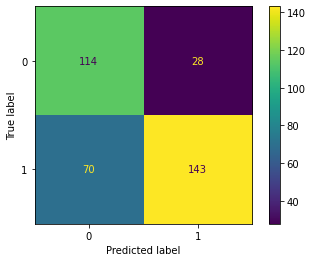

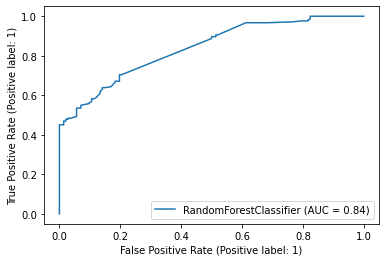

shape of words array = (1417, 50)
shape of bigrams array = (1417, 50)
<-------------- common words ------------------>


,crime,agree,lot,answer,khan,sadiq,stabbing,love,mayor,police,lockdown,dogs,stabbed,preview,tale,...,comedy,officers,black,male,street,people,faye,mary,rhony,blackcatappreciationday,harass,victims,domesticabuse,speakers,park
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<-------------- common bigrams ------------------>


,lot answer,answer agree,sadiq khan,preview extract,extract lockdown,lockdown dogs,dogs tale,tale readabook,readabook shortstories,shortstories love,love humor,humor motivat,criminal offence,faye mary,mary rhony,...,thought crime,woman wearing,wearing charlie,hebdo tshirt,hyde park,stabbing horror,mayor listen,listen party,party telling,telling scrap,scrap silvertown,silvertown years,khan urges,twitter world,world caring
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<------- features created from WORDS only ---------->
shape of df_all_data = (1417, 52)

 <----- First 5 rows of df_all_data ----->


,crime,agree,lot,answer,khan,sadiq,stabbing,love,mayor,police,lockdown,dogs,stabbed,preview,tale,...,black,male,street,people,faye,mary,rhony,blackcatappreciationday,harass,victims,domesticabuse,speakers,park,target,Tweet_lemmatized
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['seriously', 'injured', 'stabbing', 'teen', '..."
1,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['’', 'six', 'years', '’', 'sadiq', 'khan', 'l..."
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['’', 'six', 'years', '’', 'lambasted', 'knife..."
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['knifecrime', 'fallen', 'low', 'total', 'five..."
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['knifecrime', 'fallen', 'low', 'total', 'five..."


shape of labels = (1417,)
shape of features = (1417, 50)
Training Features Shape: (1062, 50)
Training Labels Shape: (1062,)
Testing Features Shape: (355, 50)
Testing Labels Shape: (355,)
------------------------------------------------------------------
Printing performance metrics for normal
------------------------------------------------------------------

prediction accuracy 0.723943661971831
precision 0.844311377245509
recall 0.6619718309859155
Area under the curve score 0.7394366197183099




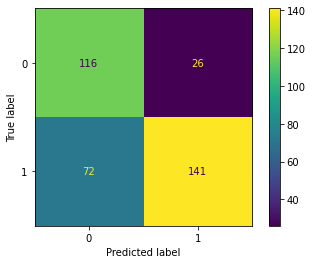

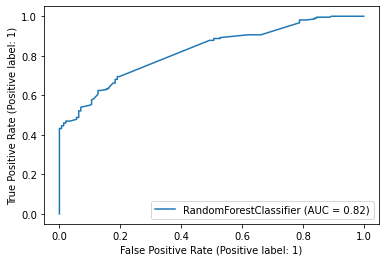

shape of words array = (1417, 50)
shape of bigrams array = (1417, 50)
<-------------- common words ------------------>


,crime,agree,lot,answer,khan,sadiq,stabbing,love,mayor,police,lockdown,dogs,stabbed,preview,tale,...,comedy,officers,black,male,street,people,faye,mary,rhony,blackcatappreciationday,harass,victims,domesticabuse,speakers,park
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<-------------- common bigrams ------------------>


,lot answer,answer agree,sadiq khan,preview extract,extract lockdown,lockdown dogs,dogs tale,tale readabook,readabook shortstories,shortstories love,love humor,humor motivat,criminal offence,faye mary,mary rhony,...,thought crime,woman wearing,wearing charlie,hebdo tshirt,hyde park,stabbing horror,mayor listen,listen party,party telling,telling scrap,scrap silvertown,silvertown years,khan urges,twitter world,world caring
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<------- features created from BIGRAMS only ---------->
shape of df_all_data = (1417, 52)

 <----- First 5 rows of df_all_data ----->


,lot answer,answer agree,sadiq khan,preview extract,extract lockdown,lockdown dogs,dogs tale,tale readabook,readabook shortstories,shortstories love,love humor,humor motivat,criminal offence,faye mary,mary rhony,...,wearing charlie,hebdo tshirt,hyde park,stabbing horror,mayor listen,listen party,party telling,telling scrap,scrap silvertown,silvertown years,khan urges,twitter world,world caring,target,Tweet_lemmatized
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['seriously', 'injured', 'stabbing', 'teen', '..."
1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['’', 'six', 'years', '’', 'sadiq', 'khan', 'l..."
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['’', 'six', 'years', '’', 'lambasted', 'knife..."
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['knifecrime', 'fallen', 'low', 'total', 'five..."
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['knifecrime', 'fallen', 'low', 'total', 'five..."


shape of labels = (1417,)
shape of features = (1417, 50)
Training Features Shape: (1062, 50)
Training Labels Shape: (1062,)
Testing Features Shape: (355, 50)
Testing Labels Shape: (355,)
------------------------------------------------------------------
Printing performance metrics for normal
------------------------------------------------------------------

prediction accuracy 0.6619718309859155
precision 0.6439628482972136
recall 0.9765258215962441
Area under the curve score 0.5833333333333333




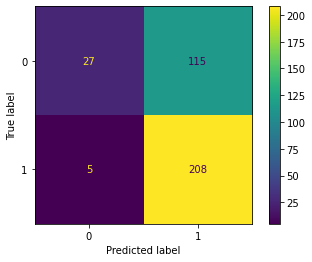

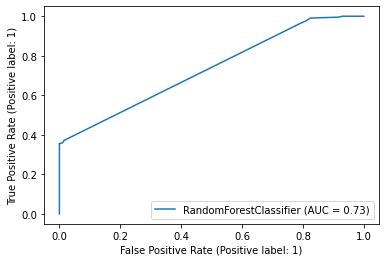

shape of words array = (1417, 100)
shape of bigrams array = (1417, 100)
<-------------- common words ------------------>


,crime,agree,lot,answer,khan,sadiq,stabbing,love,mayor,police,lockdown,dogs,stabbed,preview,tale,...,officer,evening,londo,change,rules,scene,number,hate,family,share,marcusgarvey,ethnonationalist,ethnonationalism,wrong,thought
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<-------------- common bigrams ------------------>


,lot answer,answer agree,sadiq khan,preview extract,extract lockdown,lockdown dogs,dogs tale,tale readabook,readabook shortstories,shortstories love,love humor,humor motivat,criminal offence,faye mary,mary rhony,...,mirth meets,meets murder,bikestormz antiknife,antiknife crime,crime movement,broad daylight,underground station,stabbed death,home coops,boy left,horrific crime,millhill delighted,delighted announce,silvertown tunnel,resisting year
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<------- features created from both WORDS and BIGRAMS ------>
shape of df_all_data = (1417, 202)

 <----- First 5 rows of df_all_data ----->


,lot answer,answer agree,sadiq khan,preview extract,extract lockdown,lockdown dogs,dogs tale,tale readabook,readabook shortstories,shortstories love,love humor,humor motivat,criminal offence,faye mary,mary rhony,...,officer,evening,londo,change,rules,scene,number,hate,family,share,marcusgarvey,ethnonationalist,ethnonationalism,wrong,thought
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


shape of labels = (1417,)
shape of features = (1417, 200)
Training Features Shape: (1062, 200)
Training Labels Shape: (1062,)
Testing Features Shape: (355, 200)
Testing Labels Shape: (355,)
------------------------------------------------------------------
Printing performance metrics for normal
------------------------------------------------------------------

prediction accuracy 0.819718309859155
precision 0.8281938325991189
recall 0.8826291079812206
Area under the curve score 0.8039906103286384




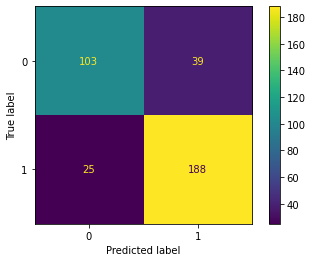

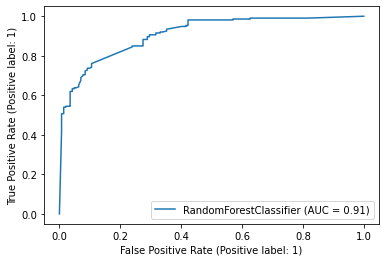

shape of words array = (1417, 100)
shape of bigrams array = (1417, 100)
<-------------- common words ------------------>


,crime,agree,lot,answer,khan,sadiq,stabbing,love,mayor,police,lockdown,dogs,stabbed,preview,tale,...,officer,evening,londo,change,rules,scene,number,hate,family,share,marcusgarvey,ethnonationalist,ethnonationalism,wrong,thought
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<-------------- common bigrams ------------------>


,lot answer,answer agree,sadiq khan,preview extract,extract lockdown,lockdown dogs,dogs tale,tale readabook,readabook shortstories,shortstories love,love humor,humor motivat,criminal offence,faye mary,mary rhony,...,mirth meets,meets murder,bikestormz antiknife,antiknife crime,crime movement,broad daylight,underground station,stabbed death,home coops,boy left,horrific crime,millhill delighted,delighted announce,silvertown tunnel,resisting year
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<------- features created from WORDS only ---------->
shape of df_all_data = (1417, 102)

 <----- First 5 rows of df_all_data ----->


,crime,agree,lot,answer,khan,sadiq,stabbing,love,mayor,police,lockdown,dogs,stabbed,preview,tale,...,londo,change,rules,scene,number,hate,family,share,marcusgarvey,ethnonationalist,ethnonationalism,wrong,thought,target,Tweet_lemmatized
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['seriously', 'injured', 'stabbing', 'teen', '..."
1,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['’', 'six', 'years', '’', 'sadiq', 'khan', 'l..."
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['’', 'six', 'years', '’', 'lambasted', 'knife..."
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['knifecrime', 'fallen', 'low', 'total', 'five..."
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['knifecrime', 'fallen', 'low', 'total', 'five..."


shape of labels = (1417,)
shape of features = (1417, 100)
Training Features Shape: (1062, 100)
Training Labels Shape: (1062,)
Testing Features Shape: (355, 100)
Testing Labels Shape: (355,)
------------------------------------------------------------------
Printing performance metrics for normal
------------------------------------------------------------------

prediction accuracy 0.7830985915492957
precision 0.8008849557522124
recall 0.8497652582159625
Area under the curve score 0.7664319248826292




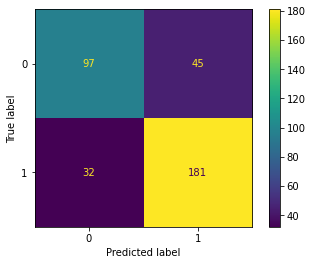

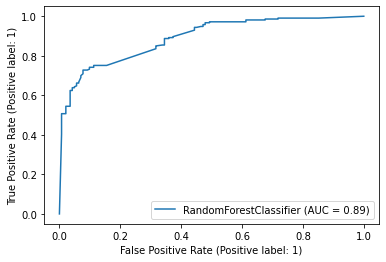

shape of words array = (1417, 100)
shape of bigrams array = (1417, 100)
<-------------- common words ------------------>


,crime,agree,lot,answer,khan,sadiq,stabbing,love,mayor,police,lockdown,dogs,stabbed,preview,tale,...,officer,evening,londo,change,rules,scene,number,hate,family,share,marcusgarvey,ethnonationalist,ethnonationalism,wrong,thought
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<-------------- common bigrams ------------------>


,lot answer,answer agree,sadiq khan,preview extract,extract lockdown,lockdown dogs,dogs tale,tale readabook,readabook shortstories,shortstories love,love humor,humor motivat,criminal offence,faye mary,mary rhony,...,mirth meets,meets murder,bikestormz antiknife,antiknife crime,crime movement,broad daylight,underground station,stabbed death,home coops,boy left,horrific crime,millhill delighted,delighted announce,silvertown tunnel,resisting year
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<------- features created from BIGRAMS only ---------->
shape of df_all_data = (1417, 102)

 <----- First 5 rows of df_all_data ----->


,lot answer,answer agree,sadiq khan,preview extract,extract lockdown,lockdown dogs,dogs tale,tale readabook,readabook shortstories,shortstories love,love humor,humor motivat,criminal offence,faye mary,mary rhony,...,bikestormz antiknife,antiknife crime,crime movement,broad daylight,underground station,stabbed death,home coops,boy left,horrific crime,millhill delighted,delighted announce,silvertown tunnel,resisting year,target,Tweet_lemmatized
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['seriously', 'injured', 'stabbing', 'teen', '..."
1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['’', 'six', 'years', '’', 'sadiq', 'khan', 'l..."
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['’', 'six', 'years', '’', 'lambasted', 'knife..."
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['knifecrime', 'fallen', 'low', 'total', 'five..."
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"['knifecrime', 'fallen', 'low', 'total', 'five..."


shape of labels = (1417,)
shape of features = (1417, 100)
Training Features Shape: (1062, 100)
Training Labels Shape: (1062,)
Testing Features Shape: (355, 100)
Testing Labels Shape: (355,)
------------------------------------------------------------------
Printing performance metrics for normal
------------------------------------------------------------------

prediction accuracy 0.7380281690140845
precision 0.7027027027027027
recall 0.9765258215962441
Area under the curve score 0.6784037558685446




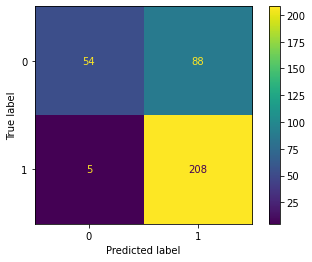

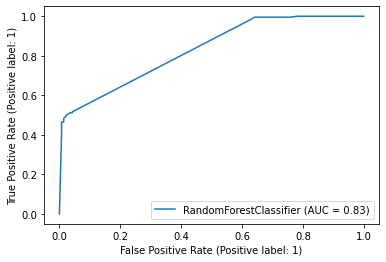

In [20]:
n=50 # number of words, bigrams to include in vocabularies
myMode = features_mode.DEFAULT # 'DEFAULT WORDS BIGRAMS'
description = 'Features: Words and Bigrams, Vocab Count: 50'
rf_result_row, rf, df_all_data = run_scenario(description, pruned_tweets, corpus, n, myMode, printFile='N')
rf_results_df = rf_results_df.append(rf_result_row, ignore_index=True)

myMode = features_mode.WORDS # 'DEFAULT WORDS BIGRAMS'
description = 'Features: Words only, Vocab Count: 50'
rf_result_row, rf, df_all_data = run_scenario(description, pruned_tweets, corpus, n, myMode, printFile='N')
rf_results_df = rf_results_df.append(rf_result_row, ignore_index=True)

myMode = features_mode.BIGRAMS # 'DEFAULT WORDS BIGRAMS'
description = 'Features: Bigrams only, Vocab Count: 50'
rf_result_row, rf, df_all_data = run_scenario(description, pruned_tweets, corpus, n, myMode, printFile='N')
rf_results_df = rf_results_df.append(rf_result_row, ignore_index=True)

n=100 # number of words, bigrams to include in vocabularies
myMode = features_mode.DEFAULT # 'DEFAULT WORDS BIGRAMS'
description = 'Features: Words and Bigrams, Vocab Count: 100'
rf_result_row, rf, df_all_data = run_scenario(description, pruned_tweets, corpus, n, myMode, printFile='N')
rf_results_df = rf_results_df.append(rf_result_row, ignore_index=True)

myMode = features_mode.WORDS # 'DEFAULT WORDS BIGRAMS'
description = 'Features: Words only, Vocab Count: 100'
rf_result_row, rf, df_all_data = run_scenario(description, pruned_tweets, corpus, n, myMode, printFile='N')
rf_results_df = rf_results_df.append(rf_result_row, ignore_index=True)

myMode = features_mode.BIGRAMS # 'DEFAULT WORDS BIGRAMS'
description = 'Features: Bigrams only, Vocab Count: 100'
rf_result_row, rf, df_all_data = run_scenario(description, pruned_tweets, corpus, n, myMode, printFile='N')
rf_results_df = rf_results_df.append(rf_result_row, ignore_index=True)

In [21]:
rf_results_df.sort_values(by='auc', ascending=False)

,description,accuracy,precision,recall,auc,true positive,false positive,true negative,false negative
3,"Features: Words and Bigrams, Vocab Count: 100",0.819718,0.828194,0.882629,0.803991,188,39,103,25
4,"Features: Words only, Vocab Count: 100",0.783099,0.800885,0.849765,0.766432,181,45,97,32
1,"Features: Words only, Vocab Count: 50",0.723944,0.844311,0.661972,0.739437,141,26,116,72
0,"Features: Words and Bigrams, Vocab Count: 50",0.723944,0.836257,0.671362,0.737089,143,28,114,70
5,"Features: Bigrams only, Vocab Count: 100",0.738028,0.702703,0.976526,0.678404,208,88,54,5
2,"Features: Bigrams only, Vocab Count: 50",0.661972,0.643963,0.976526,0.583333,208,115,27,5


### Comments
#### 12/08/2021
- the bigrams are being picked up correctly and the dataframe join worked fine but 710 of 1128 contained all zeros and this suggests top 50 bigrams is not granular enough to differentiate on its own, so we will now add individual words as well

### Comments

Best results when using both words and bigrams and also when using the top 100 (rather than 50) words/bigrams in their respective vocabularies.

I'm actually very surprised that we got such good results and in fact our results outperformed those observed by Bovet using a far bigger test dataset. 
- My good results might be being driven by the good recall results - maybe words so string they clearly identify the against camp and such good results for against camp are also boosting overall precision results.

Let's test this by visualising top 20 most important features in our best module permutation.

In [22]:
n=100 # number of words, bigrams to include in vocabularies
myMode = features_mode.DEFAULT # WORDS and BIGRAMS

words_vocab, ngrams_vocab = get_words_ngrams(pruned_tweets.Clean_MessageText, n)
df_individual_words = get_word_features(words_vocab, corpus)
df_ngrams = get_bigram_features(ngrams_vocab, corpus)

# features_modes: if both, then DEFAULT, if just words then WORDS, if just bigrams then BIGRAMS
features, labels, df_all_data = get_features_and_labels(pruned_tweets, df_individual_words, df_ngrams, 
                                           myMode, printFile='N')

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size = 0.25, random_state = 42)

shape of words array = (1417, 100)
shape of bigrams array = (1417, 100)
<------- features created from both WORDS and BIGRAMS ------>
shape of df_all_data = (1417, 202)

 <----- First 5 rows of df_all_data ----->


,lot answer,answer agree,agree knifecrime,sadiq khan,preview extract,extract lockdown,lockdown dogs,dogs tale,tale readabook,readabook shortstories,shortstories love,love humor,humor motivat,criminal offence,faye mary,...,city,urges,charlie,hebdo,officer,evening,londo,change,rules,scene,number,family,share,marcusgarvey,ethnonationalist
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


shape of labels = (1417,)
shape of features = (1417, 200)


shape of words array = (1417, 100)
shape of bigrams array = (1417, 100)
<-------------- common words ------------------>


,crime,agree,lot,answer,khan,sadiq,stabbing,love,mayor,police,lockdown,dogs,stabbed,preview,tale,...,officer,evening,londo,change,rules,scene,number,hate,family,share,marcusgarvey,ethnonationalist,ethnonationalism,wrong,thought
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<-------------- common bigrams ------------------>


,lot answer,answer agree,sadiq khan,preview extract,extract lockdown,lockdown dogs,dogs tale,tale readabook,readabook shortstories,shortstories love,love humor,humor motivat,criminal offence,faye mary,mary rhony,...,mirth meets,meets murder,bikestormz antiknife,antiknife crime,crime movement,broad daylight,underground station,stabbed death,home coops,boy left,horrific crime,millhill delighted,delighted announce,silvertown tunnel,resisting year
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<------- features created from both WORDS and BIGRAMS ------>
shape of df_all_data = (1417, 202)

 <----- First 5 rows of df_all_data ----->


,lot answer,answer agree,sadiq khan,preview extract,extract lockdown,lockdown dogs,dogs tale,tale readabook,readabook shortstories,shortstories love,love humor,humor motivat,criminal offence,faye mary,mary rhony,...,officer,evening,londo,change,rules,scene,number,hate,family,share,marcusgarvey,ethnonationalist,ethnonationalism,wrong,thought
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


shape of labels = (1417,)
shape of features = (1417, 200)
Training Features Shape: (1062, 200)
Training Labels Shape: (1062,)
Testing Features Shape: (355, 200)
Testing Labels Shape: (355,)
------------------------------------------------------------------
Printing performance metrics for normal
------------------------------------------------------------------

prediction accuracy 0.819718309859155
precision 0.8281938325991189
recall 0.8826291079812206
Area under the curve score 0.8039906103286384




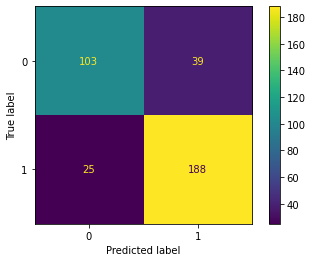

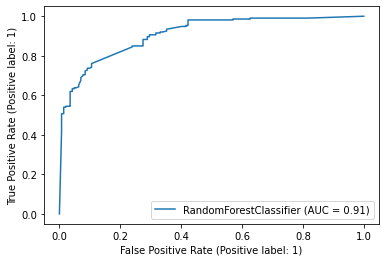

{'description': 'Features: Words and Bigrams, Vocab Count: 100',
 'accuracy': 0.819718309859155,
 'precision': 0.8281938325991189,
 'recall': 0.8826291079812206,
 'auc': 0.8039906103286384,
 'true positive': 188,
 'false positive': 39,
 'true negative': 103,
 'false negative': 25}

In [23]:
n=100 # number of words, bigrams to include in vocabularies
myMode = features_mode.DEFAULT # 'DEFAULT WORDS BIGRAMS'
description = 'Features: Words and Bigrams, Vocab Count: 100'
rf_result_row, rf, df_all_data = run_scenario(description, pruned_tweets, corpus, n, myMode, printFile='N')

rf_result_row

In [24]:
# Calculate feature importances
importances = rf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
    
feature_list = list(df_all_data.columns)
    
# Rearrange feature names so they match the sorted feature importances
names = [feature_list[i] for i in indices]
    
# select top 20 
n_features = 25
top_names = names[:n_features]
top_n_indices = indices[:n_features]
top_importances = importances[top_n_indices]

feature_importance_df = pd.DataFrame(list(zip(top_names, top_importances)),
               columns =['word_or_bigram', 'importance_value'])



In [25]:
import altair as alt

bar = alt.Chart(feature_importance_df, title='Feature Importance').mark_bar(
    opacity=0.6, color='firebrick', size=20).encode(
    y=alt.Y('word_or_bigram:N', axis=alt.Axis(title=None, ticks=False), sort='-x'),
    x=alt.X('importance_value:Q', axis=None),  
)

text = alt.Chart(feature_importance_df).mark_text(
    align='center',
    baseline='middle',
    color='white',
    dx=-20 
).encode(
    y=alt.Y('word_or_bigram:N', axis=alt.Axis(ticks=False), sort='-x'),
    x=alt.X('importance_value:Q', axis=None),
    text=alt.Text('importance_value:Q', format=',.2')
)

(bar + text).properties(
    width=400,
    height=550).configure_axis(
    grid=False,
    domain=False
).configure_view(
    strokeWidth=0)

alt.LayerChart(...)

### I need to review the important features and see whether they exist as text AND hashtags
Check to see any hashtags in a tweets which has the following words present in the text (many of the important features aren't included in our labelling hashtags):
- crime
- london
- police
- stabbed

In [55]:
pruned_tweets[['hashtags', 'Clean_MessageText', 'Clean_MessageText_refined']].head()

,hashtags,Clean_MessageText,Clean_MessageText_refined
0,"['#crime', '#hortonandwellington', '#knife']",seriously injured stabbing teen girl woman cha...,seriously injured stabbing teen girl woman cha...
1,"['#sadiq', '#khan', '#knife', '#crime']",’ six years ’ sadiq khan lambasted knife crime...,’ six years ’ sadiq khan lambasted knife surge...
2,['#khanage'],’ six years ’ lambasted knife crime surge khan...,’ six years ’ lambasted knife crime surge cont...
3,"['#knifecrime', '#london']",knifecrime fallen low total five years,fallen low total five years
4,"['#knifecrime', '#london']",knifecrime fallen low total five years,fallen low total five years


In [80]:
def check_for_text_and_hashtags(tweets, word):
    print("\n<---------------------------- processing {} ---------------------------->\n".format(word))
    clean_shape = tweets[['hashtags', 'Clean_MessageText', 'Clean_MessageText_refined']][tweets.Clean_MessageText.str.contains(word)].shape
    refined_clean = tweets[['hashtags', 'Clean_MessageText', 'Clean_MessageText_refined']][tweets.Clean_MessageText_refined.str.contains(word)]

    refined_clean_shape = refined_clean.shape
    print("Number of tweets containing {} in Clean_MessageText is {} and in Clean_MessageText_refined is {}".format(word,
                                                                                                                   clean_shape[0],
                                                                                                                   refined_clean_shape[0]))
    
    # now we want tweets that contain the word AND also have the word in their hashtags
    
    tweet_count = 0
    for index, tweet in refined_clean.iterrows():
        my_hashtags = string_to_list(tweet['hashtags'])
        my_hashtags_as_set = set(my_hashtags)
        
        intersection = my_hashtags_as_set.intersection(word)
        
        if len(intersection) > 0:
            print(tweets.hashtags)
        else:
            tweet_count = tweet_count + 1
            
    print("Number of tweets with clean message text which do not contain a hashtag used to label: {}".format(tweet_count))
    
word_list = ['crime', 'london', 'police', 'stabbed']

print("Shape of original dataframe: {}".format(pruned_tweets.shape))
          
for word in word_list:
    check_for_text_and_hashtags(pruned_tweets, word)


Shape of original dataframe: (1417, 7)

<---------------------------- processing crime ---------------------------->

Number of tweets containing crime in Clean_MessageText is 582 and in Clean_MessageText_refined is 260
Number of tweets with clean message text which do not contain a hashtag used to label: 260

<---------------------------- processing london ---------------------------->

Number of tweets containing london in Clean_MessageText is 117 and in Clean_MessageText_refined is 108
Number of tweets with clean message text which do not contain a hashtag used to label: 108

<---------------------------- processing police ---------------------------->

Number of tweets containing police in Clean_MessageText is 118 and in Clean_MessageText_refined is 83
Number of tweets with clean message text which do not contain a hashtag used to label: 83

<---------------------------- processing stabbed ---------------------------->

Number of tweets containing stabbed in Clean_MessageText is 85

### Comments 
We can see from pruned_tweets.head() that labelling hashtags are removed from Clean_MessageText_refined and we can also see that our double check confirms we don't have any tweets where Clean_MessageText_refined contains a word used in a labelling hashtag AND having that hashtag in its list of hashtags.

We test this seperately in Appendix B and we confirm we are satisfied this logic is working as expected.

### We now go one step further and find optimal hyperparameters

In [26]:
import time
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 5],
    'max_features': [3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
gs_rf = GridSearchCV(estimator = rf, param_grid = param_grid, refit=True,
                          cv = 5, n_jobs = -1, verbose = 2)

tic = time.perf_counter()
gs_rf.fit(train_features, train_labels)
toc = time.perf_counter()

print(f"Running the Random Forest classifer on our best features dataset took {toc - tic:0.4f} seconds")

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [2, 3, 5],
                         'max_features': [3, 4], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 300, 500]},
             verbose=2)

Running the Random Forest classifer on our best features dataset took 63.6537 seconds


------------------------------------------------------------------
Printing performance metrics for optimal model
------------------------------------------------------------------

prediction accuracy 0.6309859154929578
precision 0.6191860465116279
recall 1.0
Area under the curve score 0.5387323943661972




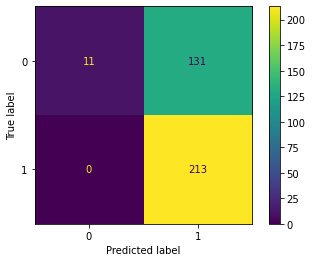

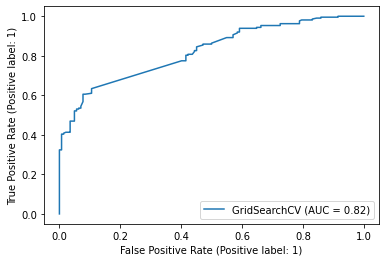

In [27]:
y_pred = gs_rf.predict(test_features)

accuracy, precision, recall, roc_auc, tn, fp, fn, tp = ml_performance.RF_performance_reporting(gs_rf, 
                                                                                test_features, 
                                                                                test_labels, 
                                                                                y_pred, 
                                                                                'optimal model', 
                                                                                print_output=True)

### Comments
The cross validated results are worse than basic results - recall is terrible and it's clearly over selecting on the true label = 0 -> are cross validated results being biased because small dataset (see if any  research)

## We now want to extrapolate to see whether we can label tweeters from the majority of their tweets

In [28]:
all_unique_users = all_tweets.tweeter_screen_name.nunique()
pruned_unique_users = pruned_tweets.tweeter_screen_name.nunique()

print("Percentage of all tweeters in our pruned dataset = {:.2%}".format(pruned_unique_users / all_unique_users))

Percentage of all tweeters in our pruned dataset = 5.30%


## We now want to predict classes for all tweets
- Recreate our classifier (the cross validated classifier is far worse performing so use original)
- classify all our tweets
- reverse engineer user opinion based on the majority of their tweets
- compare with classes from the social network analysis

### Recreate our classifier
- for this we use the corpus previously created

shape of words array = (1417, 100)
shape of bigrams array = (1417, 100)
<-------------- common words ------------------>


,crime,agree,lot,answer,khan,sadiq,stabbing,love,mayor,police,lockdown,dogs,stabbed,preview,tale,...,officer,evening,londo,change,rules,scene,number,hate,family,share,marcusgarvey,ethnonationalist,ethnonationalism,wrong,thought
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<-------------- common bigrams ------------------>


,lot answer,answer agree,sadiq khan,preview extract,extract lockdown,lockdown dogs,dogs tale,tale readabook,readabook shortstories,shortstories love,love humor,humor motivat,criminal offence,faye mary,mary rhony,...,mirth meets,meets murder,bikestormz antiknife,antiknife crime,crime movement,broad daylight,underground station,stabbed death,home coops,boy left,horrific crime,millhill delighted,delighted announce,silvertown tunnel,resisting year
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<------- features created from both WORDS and BIGRAMS ------>
shape of df_all_data = (1417, 202)

 <----- First 5 rows of df_all_data ----->


,lot answer,answer agree,sadiq khan,preview extract,extract lockdown,lockdown dogs,dogs tale,tale readabook,readabook shortstories,shortstories love,love humor,humor motivat,criminal offence,faye mary,mary rhony,...,officer,evening,londo,change,rules,scene,number,hate,family,share,marcusgarvey,ethnonationalist,ethnonationalism,wrong,thought
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


shape of labels = (1417,)
shape of features = (1417, 200)
Training Features Shape: (1062, 200)
Training Labels Shape: (1062,)
Testing Features Shape: (355, 200)
Testing Labels Shape: (355,)
------------------------------------------------------------------
Printing performance metrics for normal
------------------------------------------------------------------

prediction accuracy 0.819718309859155
precision 0.8281938325991189
recall 0.8826291079812206
Area under the curve score 0.8039906103286384




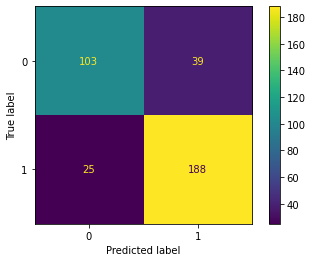

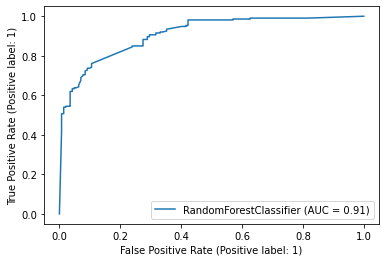

{'description': 'Features: Words and Bigrams, Vocab Count: 100',
 'accuracy': 0.819718309859155,
 'precision': 0.8281938325991189,
 'recall': 0.8826291079812206,
 'auc': 0.8039906103286384,
 'true positive': 188,
 'false positive': 39,
 'true negative': 103,
 'false negative': 25}

In [30]:
n=100 # number of words, bigrams to include in vocabularies
myMode = features_mode.DEFAULT # 'DEFAULT WORDS BIGRAMS'
description = 'Features: Words and Bigrams, Vocab Count: 100'
rf_result_row, rf, df_all_data = run_scenario(description, pruned_tweets, corpus, n, myMode, printFile='N')
rf_result_row

### Create features for whole dataset
- We use vocabs from the pruned dataset but the corpus is based on the bigger dataset 
- I am going to use the original predictions where we had them and so it doesn't matter that I'm using the whole dataframe rather than just those with hashtag = NONE, because I won't be using the predictions in the cases where they've previously been set to FOR or AGAINST anyway

In [33]:
print(all_tweets.shape)
all_tweets_new = all_tweets[~all_tweets['Clean_MessageText'].isnull()]
all_tweets_new = all_tweets_new[all_tweets_new['Clean_MessageText'].str.len() > 4].copy().reset_index()

all_tweets_new['Clean_MessageText_refined'] = all_tweets_new.apply(lambda x: remove_label_hashtags(x['Clean_MessageText'], 
                                                                                                x['hashtags'], ignore_words), 
                                                                                                 axis=1)




print(all_tweets_new.shape)

all_tweets_new.head()

(34515, 26)
(34325, 28)


,level_0,index,tweet_id,tweet_date,tweeter_id,tweeter_user_name,tweeter_screen_name,tweeter_location,message_text,in_reply_to_user_screen_name,quote_tweet_screen_name,favourite_count,retweet_count,extract_run_date,retrieved_using_search_term,retweeted,mentioned,hashtags,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_lemmatized,Clean_MessageText,tweet_date_dt,time_bins_12h,day_bins,label,Clean_MessageText_refined
0,0,0,1420355029081395203,2021-07-28 12:06:42,865262041103302656,Chris Myers,myerschrismyer1,Richmond North Yorkshire,RT @LeslieH24367191: 'Do better!' Boris Johnso...,NaN,NaN,0,40,20210728,London AND knife AND crime,['@LeslieH24367191'],[],[],Do better Boris Johnson issues scathing respo...,"['do', 'better', 'boris', 'johnson', 'issues',...","['better', 'boris', 'johnson', 'issues', 'scat...","['good', 'boris', 'johnson', 'issues', 'scathi...",good boris johnson issues scathing response sa...,2021-07-28 12:06:42,2021-07-28 12:00:00,28,NONE,good boris johnson issues scathing response sa...
1,1,1,1420354120041615364,2021-07-28 12:03:05,229645453,Emily Sheffield,emilysheffield,London,RT @NaheedMajeed: Spot on @standardnews With L...,NaN,NaN,0,2,20210728,London AND knife AND crime,['@NaheedMajeed'],['@standardnews'],[],Spot on With London on track to break record...,"['spot', 'on', 'with', 'london', 'on', 'track'...","['spot', 'track', 'break', 'record', 'teenage'...","['spot', 'track', 'break', 'record', 'teenage'...",spot track break record teenage murdersstop se...,2021-07-28 12:03:05,2021-07-28 12:00:00,28,NONE,spot track break record teenage murdersstop se...
2,2,2,1420351785156366337,2021-07-28 11:53:49,2843896642,Basilewitch,basilewitch,France,RT @Short2Cjs: Boris today speaking to Nick Fe...,NaN,NaN,0,4,20210728,London AND knife AND crime,['@Short2Cjs'],[],[],Boris today speaking to Nick Ferrari about Kh...,"['boris', 'today', 'speaking', 'to', 'nick', '...","['boris', 'today', 'speaking', 'nick', 'ferrar...","['boris', 'today', 'speaking', 'nick', 'ferrar...",boris today speaking nick ferrari khan … done ...,2021-07-28 11:53:49,2021-07-28 00:00:00,28,NONE,boris today speaking nick ferrari khan … done ...
3,3,3,1420350419449094148,2021-07-28 11:48:23,556315551,Dean Cowcher,DeanCowcher,Bexleyheath London England,RT @LeslieH24367191: 'Do better!' Boris Johnso...,NaN,NaN,0,40,20210728,London AND knife AND crime,['@LeslieH24367191'],[],[],Do better Boris Johnson issues scathing respo...,"['do', 'better', 'boris', 'johnson', 'issues',...","['better', 'boris', 'johnson', 'issues', 'scat...","['good', 'boris', 'johnson', 'issues', 'scathi...",good boris johnson issues scathing response sa...,2021-07-28 11:48:23,2021-07-28 00:00:00,28,NONE,good boris johnson issues scathing response sa...
4,4,4,1420349615954669574,2021-07-28 11:45:11,1267062754915090434,Alfiecat,sonya_annie,unknown,RT @Short2Cjs: Boris today speaking to Nick Fe...,NaN,NaN,0,4,20210728,London AND knife AND crime,['@Short2Cjs'],[],[],Boris today speaking to Nick Ferrari about Kh...,"['boris', 'today', 'speaking', 'to', 'nick', '...","['boris', 'today', 'speaking', 'nick', 'ferrar...","['boris', 'today', 'speaking', 'nick', 'ferrar...",boris today speaking nick ferrari khan … done ...,2021-07-28 11:45:11,2021-07-28 00:00:00,28,NONE,boris today speaking nick ferrari khan … done ...


In [34]:
n=100
words_vocab, ngrams_vocab = get_words_ngrams(pruned_tweets.Clean_MessageText, n)

corpus_all = get_corpus(all_tweets_new)

df_individual_words = get_word_features(words_vocab, corpus_all)
df_ngrams = get_bigram_features(ngrams_vocab, corpus_all)

df_all_data = df_ngrams.join(df_individual_words)
features = np.array(df_all_data)

features.shape

The document corpus has length: 34325
<----------------- corpus -------------->


['good boris johnson issues scathing response sadiq khans record knife crime',
 'spot track break record teenage murdersstop search vital tool no…',
 'boris today speaking nick ferrari khan … done fight knife crime streets of…',
 'good boris johnson issues scathing response sadiq khans record knife crime',
 'boris today speaking nick ferrari khan … done fight knife crime streets of…',
 'totally agree khan act crackdown knife crime reduce d…',
 'good boris johnson issues scathing response sadiq khans record knife crime',
 'good boris johnson issues scathing response sadiq khans record knife crime',
 'lot time nonlondonders make little jokes knife crime comes racist dogwhi…',
 'evening standard comment tackle root causes knife crime']


<--------- original tweets ------------->


0    good boris johnson issues scathing response sa...
1    spot track break record teenage murdersstop se...
2    boris today speaking nick ferrari khan … done ...
3    good boris johnson issues scathing response sa...
4    boris today speaking nick ferrari khan … done ...
5    totally agree khan act crackdown knife crime r...
6    good boris johnson issues scathing response sa...
7    good boris johnson issues scathing response sa...
8    lot time nonlondonders make little jokes knife...
9    evening standard comment tackle root causes kn...
Name: Clean_MessageText, dtype: object

shape of words array = (34325, 100)
shape of bigrams array = (34325, 100)


(34325, 200)

In [35]:
predictions = rf.predict(features)

In [36]:
print(type(predictions))
df_predictions = pd.DataFrame(predictions, columns = ['predicted_label'])
print(df_predictions.shape)
print(df_predictions[df_predictions.predicted_label==0].count())
print(df_predictions[df_predictions.predicted_label==1].count())
df_predictions.head()

<class 'numpy.ndarray'>
(34325, 1)
predicted_label    10005
dtype: int64
predicted_label    24320
dtype: int64


,predicted_label
0,1
1,1
2,0
3,1
4,0


In [37]:
all_tweets_new = all_tweets_new.join(df_predictions)
all_tweets_new.head()

,level_0,index,tweet_id,tweet_date,tweeter_id,tweeter_user_name,tweeter_screen_name,tweeter_location,message_text,in_reply_to_user_screen_name,quote_tweet_screen_name,favourite_count,retweet_count,extract_run_date,retrieved_using_search_term,retweeted,mentioned,hashtags,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_lemmatized,Clean_MessageText,tweet_date_dt,time_bins_12h,day_bins,label,Clean_MessageText_refined,predicted_label
0,0,0,1420355029081395203,2021-07-28 12:06:42,865262041103302656,Chris Myers,myerschrismyer1,Richmond North Yorkshire,RT @LeslieH24367191: 'Do better!' Boris Johnso...,NaN,NaN,0,40,20210728,London AND knife AND crime,['@LeslieH24367191'],[],[],Do better Boris Johnson issues scathing respo...,"['do', 'better', 'boris', 'johnson', 'issues',...","['better', 'boris', 'johnson', 'issues', 'scat...","['good', 'boris', 'johnson', 'issues', 'scathi...",good boris johnson issues scathing response sa...,2021-07-28 12:06:42,2021-07-28 12:00:00,28,NONE,good boris johnson issues scathing response sa...,1
1,1,1,1420354120041615364,2021-07-28 12:03:05,229645453,Emily Sheffield,emilysheffield,London,RT @NaheedMajeed: Spot on @standardnews With L...,NaN,NaN,0,2,20210728,London AND knife AND crime,['@NaheedMajeed'],['@standardnews'],[],Spot on With London on track to break record...,"['spot', 'on', 'with', 'london', 'on', 'track'...","['spot', 'track', 'break', 'record', 'teenage'...","['spot', 'track', 'break', 'record', 'teenage'...",spot track break record teenage murdersstop se...,2021-07-28 12:03:05,2021-07-28 12:00:00,28,NONE,spot track break record teenage murdersstop se...,1
2,2,2,1420351785156366337,2021-07-28 11:53:49,2843896642,Basilewitch,basilewitch,France,RT @Short2Cjs: Boris today speaking to Nick Fe...,NaN,NaN,0,4,20210728,London AND knife AND crime,['@Short2Cjs'],[],[],Boris today speaking to Nick Ferrari about Kh...,"['boris', 'today', 'speaking', 'to', 'nick', '...","['boris', 'today', 'speaking', 'nick', 'ferrar...","['boris', 'today', 'speaking', 'nick', 'ferrar...",boris today speaking nick ferrari khan … done ...,2021-07-28 11:53:49,2021-07-28 00:00:00,28,NONE,boris today speaking nick ferrari khan … done ...,0
3,3,3,1420350419449094148,2021-07-28 11:48:23,556315551,Dean Cowcher,DeanCowcher,Bexleyheath London England,RT @LeslieH24367191: 'Do better!' Boris Johnso...,NaN,NaN,0,40,20210728,London AND knife AND crime,['@LeslieH24367191'],[],[],Do better Boris Johnson issues scathing respo...,"['do', 'better', 'boris', 'johnson', 'issues',...","['better', 'boris', 'johnson', 'issues', 'scat...","['good', 'boris', 'johnson', 'issues', 'scathi...",good boris johnson issues scathing response sa...,2021-07-28 11:48:23,2021-07-28 00:00:00,28,NONE,good boris johnson issues scathing response sa...,1
4,4,4,1420349615954669574,2021-07-28 11:45:11,1267062754915090434,Alfiecat,sonya_annie,unknown,RT @Short2Cjs: Boris today speaking to Nick Fe...,NaN,NaN,0,4,20210728,London AND knife AND crime,['@Short2Cjs'],[],[],Boris today speaking to Nick Ferrari about Kh...,"['boris', 'today', 'speaking', 'to', 'nick', '...","['boris', 'today', 'speaking', 'nick', 'ferrar...","['boris', 'today', 'speaking', 'nick', 'ferrar...",boris today speaking nick ferrari khan … done ...,2021-07-28 11:45:11,2021-07-28 00:00:00,28,NONE,boris today speaking nick ferrari khan … done ...,0


In [38]:
all_tweets_new['for_count'] = all_tweets_new['predicted_label'][all_tweets_new['predicted_label']==0].groupby(all_tweets_new['tweeter_screen_name']).transform('count')
all_tweets_new['against_count'] = all_tweets_new['predicted_label'][all_tweets_new['predicted_label']==1].groupby(all_tweets_new['tweeter_screen_name']).transform('count')

all_tweets_new['for_count'] = all_tweets_new['for_count'].fillna(0)
all_tweets_new['against_count'] = all_tweets_new['against_count'].fillna(0)

all_tweets_new.loc[all_tweets_new.against_count <= all_tweets_new.for_count, 'proposed_label'] = 'FOR'
all_tweets_new.loc[all_tweets_new.against_count > all_tweets_new.for_count, 'proposed_label'] = 'AGAINST'

all_tweets_new.loc[(all_tweets_new.label=='NONE') & (all_tweets_new.proposed_label=='AGAINST'), 'label'] = 'AGAINST'
all_tweets_new.loc[(all_tweets_new.label=='NONE') & (all_tweets_new.proposed_label=='FOR'), 'label'] = 'FOR'

all_tweets_new.head()

,level_0,index,tweet_id,tweet_date,tweeter_id,tweeter_user_name,tweeter_screen_name,tweeter_location,message_text,in_reply_to_user_screen_name,quote_tweet_screen_name,favourite_count,retweet_count,extract_run_date,retrieved_using_search_term,...,hashtags,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_lemmatized,Clean_MessageText,tweet_date_dt,time_bins_12h,day_bins,label,Clean_MessageText_refined,predicted_label,for_count,against_count,proposed_label
0,0,0,1420355029081395203,2021-07-28 12:06:42,865262041103302656,Chris Myers,myerschrismyer1,Richmond North Yorkshire,RT @LeslieH24367191: 'Do better!' Boris Johnso...,NaN,NaN,0,40,20210728,London AND knife AND crime,...,[],Do better Boris Johnson issues scathing respo...,"['do', 'better', 'boris', 'johnson', 'issues',...","['better', 'boris', 'johnson', 'issues', 'scat...","['good', 'boris', 'johnson', 'issues', 'scathi...",good boris johnson issues scathing response sa...,2021-07-28 12:06:42,2021-07-28 12:00:00,28,AGAINST,good boris johnson issues scathing response sa...,1,0.0,3.0,AGAINST
1,1,1,1420354120041615364,2021-07-28 12:03:05,229645453,Emily Sheffield,emilysheffield,London,RT @NaheedMajeed: Spot on @standardnews With L...,NaN,NaN,0,2,20210728,London AND knife AND crime,...,[],Spot on With London on track to break record...,"['spot', 'on', 'with', 'london', 'on', 'track'...","['spot', 'track', 'break', 'record', 'teenage'...","['spot', 'track', 'break', 'record', 'teenage'...",spot track break record teenage murdersstop se...,2021-07-28 12:03:05,2021-07-28 12:00:00,28,AGAINST,spot track break record teenage murdersstop se...,1,0.0,1.0,AGAINST
2,2,2,1420351785156366337,2021-07-28 11:53:49,2843896642,Basilewitch,basilewitch,France,RT @Short2Cjs: Boris today speaking to Nick Fe...,NaN,NaN,0,4,20210728,London AND knife AND crime,...,[],Boris today speaking to Nick Ferrari about Kh...,"['boris', 'today', 'speaking', 'to', 'nick', '...","['boris', 'today', 'speaking', 'nick', 'ferrar...","['boris', 'today', 'speaking', 'nick', 'ferrar...",boris today speaking nick ferrari khan … done ...,2021-07-28 11:53:49,2021-07-28 00:00:00,28,FOR,boris today speaking nick ferrari khan … done ...,0,4.0,0.0,FOR
3,3,3,1420350419449094148,2021-07-28 11:48:23,556315551,Dean Cowcher,DeanCowcher,Bexleyheath London England,RT @LeslieH24367191: 'Do better!' Boris Johnso...,NaN,NaN,0,40,20210728,London AND knife AND crime,...,[],Do better Boris Johnson issues scathing respo...,"['do', 'better', 'boris', 'johnson', 'issues',...","['better', 'boris', 'johnson', 'issues', 'scat...","['good', 'boris', 'johnson', 'issues', 'scathi...",good boris johnson issues scathing response sa...,2021-07-28 11:48:23,2021-07-28 00:00:00,28,AGAINST,good boris johnson issues scathing response sa...,1,0.0,5.0,AGAINST
4,4,4,1420349615954669574,2021-07-28 11:45:11,1267062754915090434,Alfiecat,sonya_annie,unknown,RT @Short2Cjs: Boris today speaking to Nick Fe...,NaN,NaN,0,4,20210728,London AND knife AND crime,...,[],Boris today speaking to Nick Ferrari about Kh...,"['boris', 'today', 'speaking', 'to', 'nick', '...","['boris', 'today', 'speaking', 'nick', 'ferrar...","['boris', 'today', 'speaking', 'nick', 'ferrar...",boris today speaking nick ferrari khan … done ...,2021-07-28 11:45:11,2021-07-28 00:00:00,28,FOR,boris today speaking nick ferrari khan … done ...,0,2.0,0.0,FOR


In [39]:
print(all_tweets_new['label'][all_tweets_new.label=='FOR'].count())
print(all_tweets_new['label'][all_tweets_new.label=='AGAINST'].count())

9314
23803


In [40]:
all_tweets_new.to_csv('ttwtwtw.csv', index=False)

## Appendix A - Test the function that assigns class (get_tweet_class)

In [41]:
test_hashtags = ['[]', '[]', '[#a, #b, #c, #d]', '[#a, #b]', '[#x, #y, #z]', '[#a, #x]', '[#a, #b, #x]', '[#a, #x, #y]']
test_hashtags_df = pd.DataFrame(test_hashtags, columns =['hashtags'])

test_for_hashtags = ['#a', '#b', '#c']
test_against_hashtags = ['#x', '#y']

test_set_for = set(test_for_hashtags)
test_set_against = set(test_against_hashtags)

test_hashtags_df['label'] = '' 
test_hashtags_df['label'] = test_hashtags_df['hashtags'].apply(lambda x: get_tweet_class(x, test_set_for, test_set_against))

test_hashtags_df

,hashtags,label
0,[],NONE
1,[],NONE
2,"[#a, #b, #c, #d]",HAS_HASHTAG
3,"[#a, #b]",HAS_HASHTAG
4,"[#x, #y, #z]",HAS_HASHTAG
5,"[#a, #x]",HAS_HASHTAG
6,"[#a, #b, #x]",HAS_HASHTAG
7,"[#a, #x, #y]",HAS_HASHTAG


### Comments
The results are as expected so happy with the function

# Appendix B - Test stripping of hashtags
The requirement is to strip words from the message text if that word is one of the hashtags used to label our tweets AND the same hashtag is in the list of hashtags previously identified for the tweet.

Hashtags used to label tweets included: 
- #austerity
- #crime
- #policecuts

Use cases to test:
- 1. tweet contains no words in our hashtag list and so text passed through unchanged
- 2. tweet contains a word that's in our hashtag list but the word is not in its list of hashtags and so don't remove it from the message text
- 3. tweet contains a word that's in our hashtag list AND the word is its list of hashtags and so remove it from the message text

Assumes: 
- set_for and set_against have already been populated
- string_to_list(my_str) has been created
- remove_label_hashtags(text, hashtags, ignore_words) has been created

First create a dummy dataframe with test data.

In [45]:
# dictionary with list object in values
details = {
        'Clean_MessageText' : ['actnow climateaction', 
                           'actnow climateaction policecuts', 
                           'actnow climateaction policecuts'],
    'hashtags' : ["['#actnow', '#climateaction']", 
                  "['#actnow', '#climateaction']", 
                  "['#actnow', '#climateaction', '#policecuts']"]
}
  
# creating a Dataframe object 
dummy_df = pd.DataFrame(details)
  
dummy_df

,Clean_MessageText,hashtags
0,actnow climateaction,"['#actnow', '#climateaction']"
1,actnow climateaction policecuts,"['#actnow', '#climateaction']"
2,actnow climateaction policecuts,"['#actnow', '#climateaction', '#policecuts']"


In [47]:
set_for_ = {'#policecuts', '#austerity'}
set_against_ = {'#crime', '#khanage'}

ignore_hashtags_set_ = set_for_.union(set_against_) # create a single set containing all hashtags

ignore_hashtags_ = list(ignore_hashtags_set_) # turn set into a list
ignore_words_ = [w[1:] for w in ignore_hashtags_] # create a list of ignore words which are hashtags but without the '#' 

print("Number of items in set_for: {}, number in set_against: {} and in the combined list: {}".format(len(set_for_),
                                                                                                    len(set_against_),
                                                                                                    len(ignore_words_)))

ignore_words_

Number of items in set_for: 2, number in set_against: 2 and in the combined list: 4


['khanage', 'austerity', 'policecuts', 'crime']

In [48]:
dummy_df['Clean_MessageText_refined'] = dummy_df.apply(lambda x: remove_label_hashtags(x['Clean_MessageText'], 
                                                                                                x['hashtags'], ignore_words_), 
                                                                                                 axis=1)

dummy_df

,Clean_MessageText,hashtags,Clean_MessageText_refined
0,actnow climateaction,"['#actnow', '#climateaction']",actnow climateaction
1,actnow climateaction policecuts,"['#actnow', '#climateaction']",actnow climateaction policecuts
2,actnow climateaction policecuts,"['#actnow', '#climateaction', '#policecuts']",actnow climateaction
